![image.png](img/logistic.png)

Softmax function
- makes sure the array sums to 1

In [42]:
import tensorflow as tf
import numpy as np

try:
    from tqdm import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x


In [5]:
# Load data
data = np.load('data_with_labels.npz')
train = data['arr_0']/255.
labels = data['arr_1']
# Look at some data
print(train[0])
print(labels[0])

# If you have matplotlib installed
import matplotlib.pyplot as plt
plt.ion()

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
0


In [51]:
print(data.keys())


['arr_0', 'arr_1']

IndexError: index 1765 is out of bounds for axis 0 with size 1484

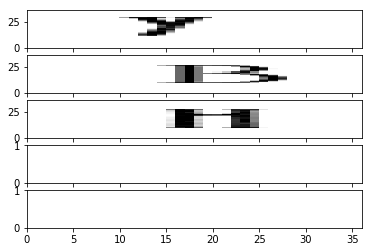

In [55]:
f, plts = plt.subplots(5, sharex=True)
c = 91
for i in range(5):
    plts[i].pcolor(train[c + i * 558],
                   cmap=plt.cm.gray_r)

# One hot encoding
- 1 in position 2 means its class 3
- each column for a binary yes

In [31]:
def to_onehot(labels,nclasses = 5):
    '''
    Convert labels to "one-hot" format.
    >>> a = [0,1,2,3]
    >>> to_onehot(a,5)
    array([[ 1.,  0.,  0.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  0.,  0.],
           [ 0.,  0.,  0.,  1.,  0.]])
    '''
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels
onehot = to_onehot(labels)
onehot

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.]])

# Splitting into training / validation

In [38]:
# Split data into training and validation
indices = np.random.permutation(train.shape[0])
valid_cnt = int(train.shape[0] * 0.1)
print("valid_cnt")
print(valid_cnt)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
assert len(test_idx) == valid_cnt
    
test, train = train[test_idx,:],\
              train[training_idx,:]
    
    
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]
print("one hot encoding")    
print(onehot_test)
print(onehot_train)

valid_cnt
164
one hot encoding
[[ 0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 

# Interactive session

x [None, 1296]
- input image data
- None means arbitrary number of DATA POINTS [x as much as you want, FIXED]
- Meanwhile 1296 is fixed because of 36*36 input size

y [None, 5]
- likewise, unlimited number of data points, hence None
- But expecting 5 number of labels

Weights W [1296,5]
- 1296 weights for EACH of the 5 font classes

b [5]
- bias
- kinda like an extra weight for bias
- like an extra input that takes in value of 1

In [52]:
36*36


1296

In [57]:
# Run an interactive session
sess = tf.InteractiveSession()

# Flattened input pixels
x = tf.placeholder("float", [None, 1296])
# Known labels
y_ = tf.placeholder("float", [None, 5])

# Variables
W = tf.Variable(tf.zeros([1296,5]))
b = tf.Variable(tf.zeros([5]))

# Init
sess.run(tf.initialize_all_variables())

# Define model
y = tf.nn.softmax(tf.matmul(x,W) + b)

y

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


<tf.Tensor 'Softmax_1:0' shape=(?, 5) dtype=float32>